In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pwd

'C:\\Users\\kapil'

In [7]:
d1= pd.read_csv('Height_Weight.csv')
d1.head(5)

,id,gender,weight,height
0,29,F,39,157
1,182,F,43,154
2,130,F,44,157
3,104,F,45,163
4,128,F,45,157


In [5]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      199 non-null    int64 
 1   gender  199 non-null    object
 2   weight  199 non-null    int64 
 3   height  199 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.3+ KB


In [5]:
d1.describe()

,id,weight,height
count,199.000000,199.000000,199.000000
mean,100.944724,65.195980,170.587940
std,57.681571,13.008031,8.948848
min,1.000000,39.000000,148.000000
25%,51.500000,55.000000,164.000000
50%,101.000000,63.000000,170.000000
75%,150.500000,73.500000,177.500000
max,200.000000,103.000000,197.000000


In [6]:
d1.describe(include='object')

,gender
count,199
unique,2
top,F
freq,111


In [8]:
d1.drop(['id'], axis= 1, inplace= True)
d1.head(5)

,gender,weight,height
0,F,39,157
1,F,43,154
2,F,44,157
3,F,45,163
4,F,45,157


In [9]:
d1.isnull().sum()

gender    0
weight    0
height    0
dtype: int64

In [10]:
d1['gender'].value_counts()

F    111
M     88
Name: gender, dtype: int64

A:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weight', ylabel='height'>

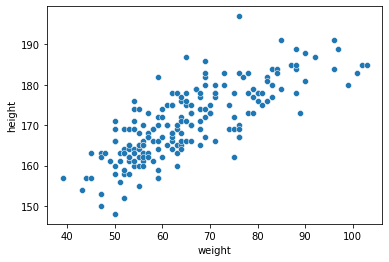

In [11]:
sns.scatterplot(d1['weight'], d1['height'])

<AxesSubplot:xlabel='gender', ylabel='count'>

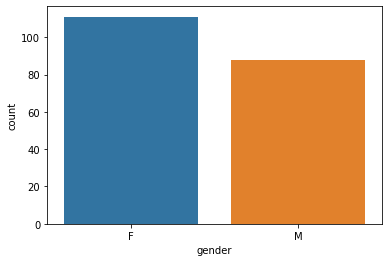

In [12]:
sns.countplot(x= 'gender', data= d1)

In [12]:
d1.corr()

,weight,height
weight,1.000000,0.782438
height,0.782438,1.000000


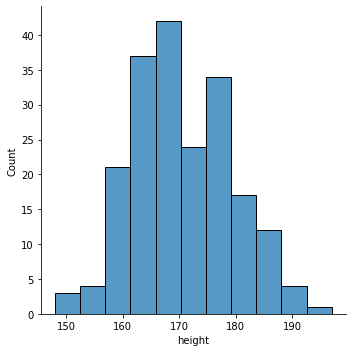

In [13]:
sns.displot(d1['height'], kind= 'hist')

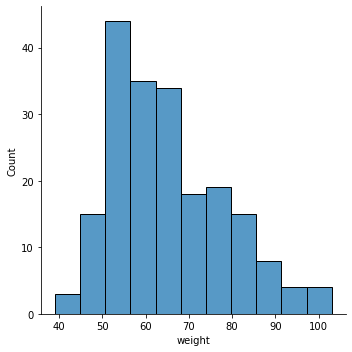

In [14]:
sns.displot(d1['weight'], kind= 'hist')

A:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='height'>

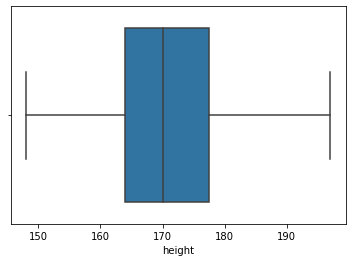

In [15]:
sns.boxplot(d1['height'])

A:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weight'>

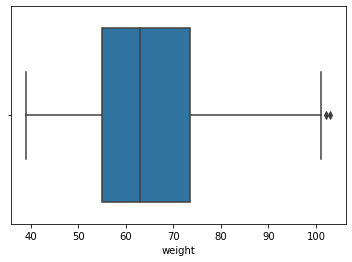

In [16]:
sns.boxplot(d1['weight'])

In [17]:
x= d1['height']
x

0      157
1      154
2      157
3      163
4      157
      ... 
194    189
195    183
196    185
197    185
198    180
Name: height, Length: 199, dtype: int64

In [18]:
y= d1['weight']
y

0       39
1       43
2       44
3       45
4       45
      ... 
194     97
195    101
196    102
197    103
198     99
Name: weight, Length: 199, dtype: int64

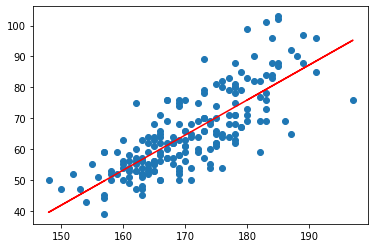

In [19]:
plt.scatter(x, y)
m,b= np.polyfit(x, y, 1)
plt.plot(x ,m*x + b, 'r')

In [20]:
d1_num= d1[['weight', 'height']]
d1_num.head(5)

,weight,height
0,39,157
1,43,154
2,44,157
3,45,163
4,45,157


In [21]:
d1_dummies= pd.get_dummies(d1['gender'])
d1_dummies.tail()

,F,M
194,0,1
195,0,1
196,0,1
197,0,1
198,0,1


In [22]:
d1_combined= pd.concat([d1_num, d1_dummies], axis= 1)
d1_combined.head(5)

,weight,height,F,M
0,39,157,1,0
1,43,154,1,0
2,44,157,1,0
3,45,163,1,0
4,45,157,1,0


In [23]:
x= d1_combined.drop(['weight'], axis= 1)
x.head(5)

,height,F,M
0,157,1,0
1,154,1,0
2,157,1,0
3,163,1,0
4,157,1,0


In [24]:
y= d1_combined[['weight']]
y.head(5)

,weight
0,39
1,43
2,44
3,45
4,45


In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, train_size= 0.7, random_state= 100)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((139, 3), (60, 3), (139, 1), (60, 1))

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
ln= LinearRegression()
ln

LinearRegression()

In [28]:
lm.fit(x_train, y_train)

LinearRegression()

In [31]:
print(lm.intercept_)

[-62.123003]


In [32]:
print(lm.coef_)

[[ 0.74711088 -4.53202557  4.53202557]]


In [34]:
x_pred= lm.predict(x_test)
print(x_pred)

[[59.60670945]
 [73.90053672]
 [52.88271157]
 [58.85959857]
 [70.16498234]
 [76.14186935]
 [75.39475847]
 [55.87115507]
 [54.37693332]
 [57.36537682]
 [79.13031285]
 [76.14186935]
 [76.14186935]
 [70.91209322]
 [74.6476476 ]
 [79.13031285]
 [85.10719986]
 [79.87742373]
 [79.13031285]
 [55.87115507]
 [57.36537682]
 [78.38320198]
 [59.60670945]
 [68.67076059]
 [59.60670945]
 [66.33070733]
 [75.39475847]
 [63.34226383]
 [82.11875636]
 [76.14186935]
 [61.84804208]
 [58.1124877 ]
 [73.15342585]
 [78.38320198]
 [75.39475847]
 [61.84804208]
 [54.37693332]
 [73.15342585]
 [68.67076059]
 [60.35382033]
 [74.6476476 ]
 [57.36537682]
 [58.1124877 ]
 [82.86586723]
 [54.37693332]
 [49.14715719]
 [50.64137894]
 [53.62982244]
 [59.60670945]
 [83.61297811]
 [64.83648558]
 [54.37693332]
 [73.90053672]
 [54.37693332]
 [52.88271157]
 [48.40004631]
 [74.6476476 ]
 [62.59515295]
 [75.39475847]
 [79.13031285]]
